# From Data to Viz

The purpose of this Recap is to choose the right data visualization for a given question on a dataset.

(Freely inspired from https://www.data-to-viz.com/)

Let's start by running the following cell:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## A - Penguins 🐧


Let's explore the Seaborn [**Penguins**](https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv) dataset, quite known in the Machine Learning beginners community.

Here's a nice picture to get used to the vocabulary around these Penguins:

<img src="https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/gentoo.png" height=700>

In [2]:
penguin_df = sns.load_dataset('penguins')
penguin_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


---

### ❓ 1 - Counting Species

How many different species are there in the dataset? Use a Seaborn plot to visualize their relative importance.

<AxesSubplot:xlabel='species', ylabel='count'>

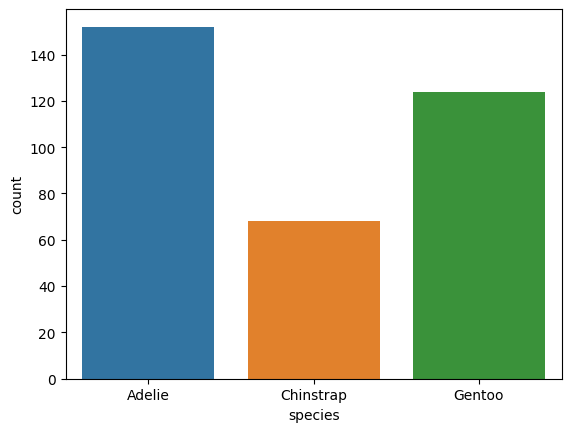

In [3]:
sns.countplot(x='species', data=penguin_df)

---
### ❓ 2 - Body mass distribution

Let's see if the body mass distribution in the dataset is normal or not. Use a Seaborn plot to visualize the distribution of the `body_mass_g` column of `penguin_df`.

<AxesSubplot:xlabel='body_mass_g', ylabel='Count'>

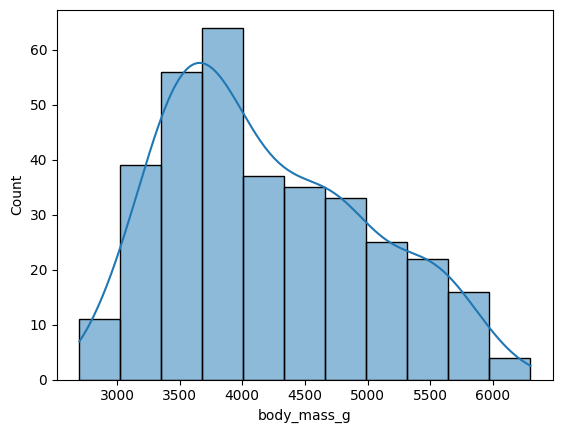

In [12]:
sns.histplot(penguin_df['body_mass_g'],  kde = True)

---
### ❓ 3 - Relationships of Numerical variables

Let's use a Seaborn plot to quickly get a sense of the `(x, y)` relationship of all couples of numerical columns ('bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', etc.). You should use a plot which will draw 16 subplots in one line of code!

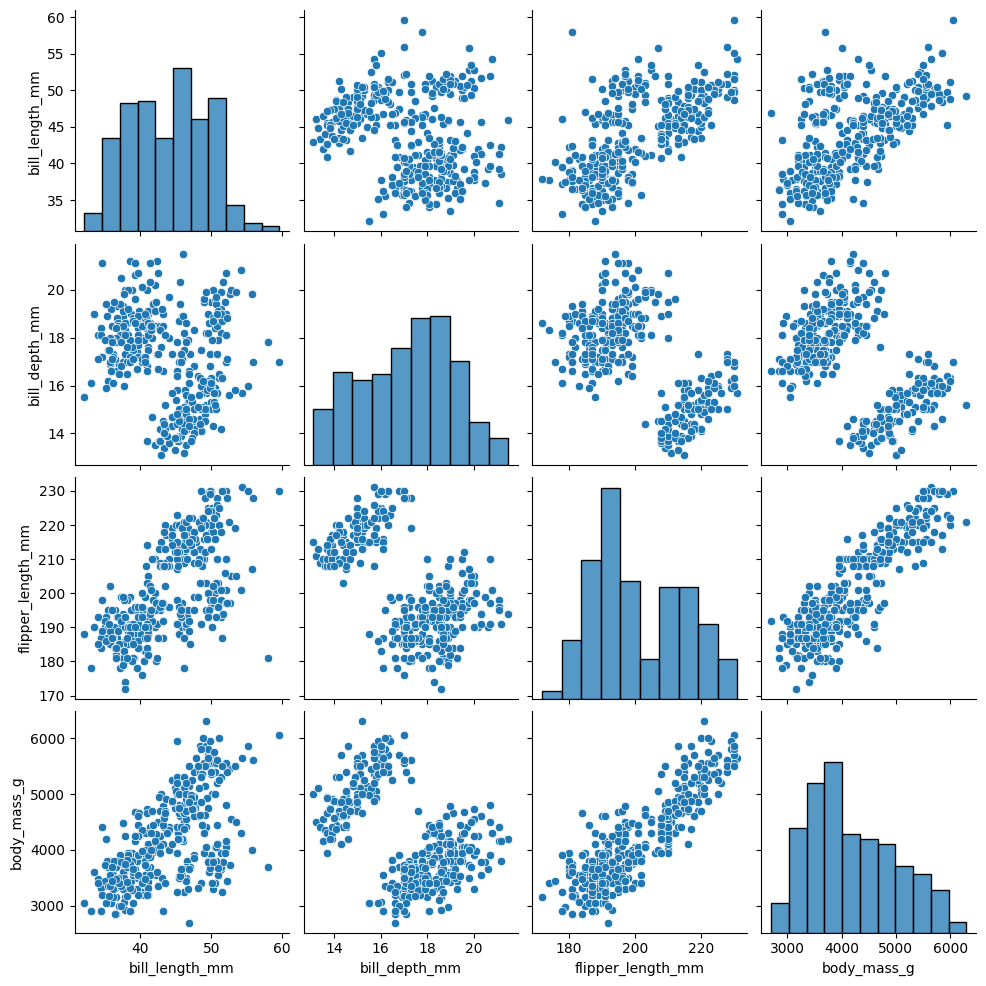

In [14]:
sns.pairplot(penguin_df)

---

### ❓ 4 - Numerical + Categorical

We learned a lot about this sample of penguins:
- `bill_length_mm` seems to be an important dimension to identify penguins
- some of their dimensions are correlated
- there are 3 species
 
How can you visualize the differences between the 3 species of  penguins with different colors? Using Seaborn, write some code to get some helpful scatterplots and/or violin-plots (we want to use the `species` as colors to better identify groups!).

In [15]:
penguin_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


<AxesSubplot:xlabel='bill_length_mm', ylabel='body_mass_g'>

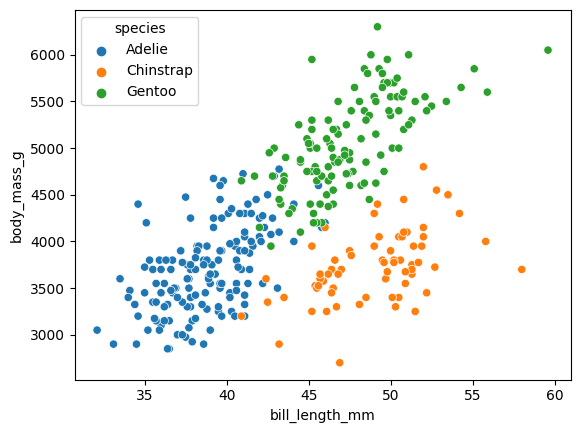

In [18]:
sns.scatterplot(x='bill_length_mm', y='body_mass_g', hue='species', data=penguin_df)

<AxesSubplot:xlabel='bill_length_mm', ylabel='flipper_length_mm'>

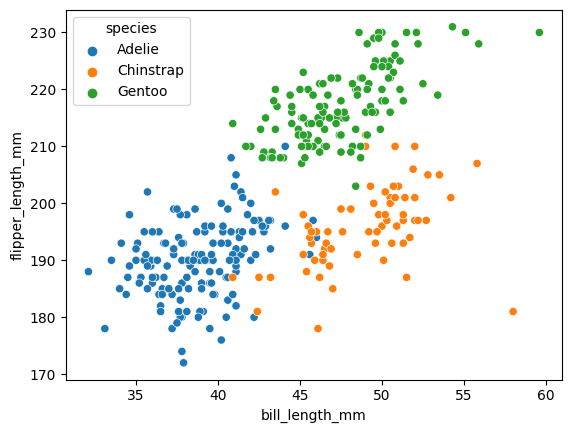

In [19]:
sns.scatterplot(x='bill_length_mm', y='flipper_length_mm', hue='species', data=penguin_df)

In [ ]:
# YOUR CODE HERE

---
## B - Maps 🗺


😱 **Imagine a world where people can't go further than 100km from home**. How can you help them to know where they can go?

For this second part of the Recap, we will be using the [`folium`](https://python-visualization.github.io/folium/) package, a wrapper around the [`Leaflet`](https://leafletjs.com/) JavaScript library.

In [ ]:
!pip install --quiet folium

Now import Folium:

In [20]:
import folium

---

### ❓ 1 - Draw your first map

The goal of this first question is to:

- Draw a map centered at specific coordinates (check out [gps-coorinates.net](https://www.gps-coordinates.net/))
- Put a marker at that specific point
- Draw a circle of 100km centered at specific point

Check out the [`folium` Quickstart](https://python-visualization.github.io/folium/quickstart.html), you should find all the code examples you need, good luck!

In [26]:
coordinates = [48.8649224, 2.3800903] # 16 Villa Gaudelet, Paris

m = folium.Map(location=coordinates)

folium.Marker(
    location=coordinates,
    tooltip="Click me!",
    popup="this is paris",
    icon=folium.Icon(icon="cloud"),
).add_to(m)

radius = 100000
folium.Circle(
    location=coordinates,
    radius=radius,
    color="black",
    weight=1,
    fill_opacity=0.2,
    opacity=1,
    fill_color="green",
    fill=False,  # gets overridden by fill_color
    popup="{} meters".format(radius),
    tooltip="I am in meters",
).add_to(m)

m

---

### ❓ 2 - Build a User-Friendly tool

The problem of the previous code is that we need to manually convert an address into the GPS coordinates. Let's implement a program so that user can specify their plain text address and get the map drawn for that point:

```python
draw_100km_map("138 Kingsland Rd, London E2 8DY")
```

💡 Hint: You can use the [Nominatim Search API](https://nominatim.org/release-docs/latest/api/Search/) to implement a `geocode(address)` function which returns a list of `[lat, lng]` coordinates. 

In [39]:
import requests

def draw_100km_map(address):
    url = 'https://nominatim.openstreetmap.org/search'
    response = requests.get(url, params= {
        'q': address,
        'format': 'json'
    }).json()

    data = response[0]
    data


    coordinates = [data['lat'], data['lon']]

    m = folium.Map(location=coordinates)

    folium.Marker(
        location=coordinates,
        tooltip="Click me!",
        popup="this is paris",
        icon=folium.Icon(icon="cloud"),
    ).add_to(m)

    radius = 100000
    folium.Circle(
        location=coordinates,
        radius=radius,
        color="black",
        weight=1,
        fill_opacity=0.2,
        opacity=1,
        fill_color="green",
        fill=False,  # gets overridden by fill_color
        popup="{} meters".format(radius),
        tooltip="I am in meters",
    ).add_to(m)
    
    return m

The interactive tool:

In [40]:
address = input("Input your address > ")
draw_100km_map(address)

Input your address > Miami, FL
